In [73]:
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd

In [2]:
get_price("000001.XSHE", start_date="2017-01-01", end_date="2017-01-06")

open   close    high     low  total_turnover      volume  \
2017-01-03  8.9788  9.0281  9.0478  8.9591    4.205952e+08  45984049.0   
2017-01-04  9.0182  9.0281  9.0478  9.0084    4.115034e+08  44932953.0   
2017-01-05  9.0379  9.0379  9.0478  9.0182    3.157697e+08  34437291.0   
2017-01-06  9.0379  8.9985  9.0379  8.9788    3.271764e+08  35815420.0   

            limit_up  limit_down  
2017-01-03    9.8658      8.0720  
2017-01-04    9.9348      8.1213  
2017-01-05    9.9348      8.1213  
2017-01-06    9.9447      8.1312

In [5]:
price = get_price(['000024.XSHE', '000001.XSHE', '000002.XSHE'], start_date='2015-04-01', end_date='2015-04-12')

In [7]:
# pandas  panel
price

<class 'rqcommons.pandas_patch.HybridDataPanel'>
Dimensions: 8 (items) x 7 (major_axis) x 3 (minor_axis)
Items axis: open to limit_down
Major_axis axis: 2015-04-01 00:00:00 to 2015-04-10 00:00:00
Minor_axis axis: 000024.XSHE to 000002.XSHE

In [8]:
get_trading_dates(start_date="2017-01-01", end_date="2018-01-01")

[datetime.date(2017, 1, 3),
 datetime.date(2017, 1, 4),
 datetime.date(2017, 1, 5),
 datetime.date(2017, 1, 6),
 datetime.date(2017, 1, 9),
 datetime.date(2017, 1, 10),
 datetime.date(2017, 1, 11),
 datetime.date(2017, 1, 12),
 datetime.date(2017, 1, 13),
 datetime.date(2017, 1, 16),
 datetime.date(2017, 1, 17),
 datetime.date(2017, 1, 18),
 datetime.date(2017, 1, 19),
 datetime.date(2017, 1, 20),
 datetime.date(2017, 1, 23),
 datetime.date(2017, 1, 24),
 datetime.date(2017, 1, 25),
 datetime.date(2017, 1, 26),
 datetime.date(2017, 2, 3),
 datetime.date(2017, 2, 6),
 datetime.date(2017, 2, 7),
 datetime.date(2017, 2, 8),
 datetime.date(2017, 2, 9),
 datetime.date(2017, 2, 10),
 datetime.date(2017, 2, 13),
 datetime.date(2017, 2, 14),
 datetime.date(2017, 2, 15),
 datetime.date(2017, 2, 16),
 datetime.date(2017, 2, 17),
 datetime.date(2017, 2, 20),
 datetime.date(2017, 2, 21),
 datetime.date(2017, 2, 22),
 datetime.date(2017, 2, 23),
 datetime.date(2017, 2, 24),
 datetime.date(2017, 2, 

In [13]:
# 获取财务数据
q = query(fundamentals.income_statement.revenue,
         fundamentals.income_statement.cost_of_goods_sold
         ).filter(fundamentals.stockcode.in_(['000024.XSHE', '000001.XSHE']))
fund = get_fundamentals(q, entry_date="2017-01-03")

In [17]:
q = query(fundamentals.income_statement.revenue,
         fundamentals.income_statement.cost_of_goods_sold
         )
fund = get_fundamentals(q, entry_date="2017-01-03")

In [18]:
# 换成截面数据
fund[:, 0, :] # 截面数据，DataFrame，股票代号、列指标名字

revenue cost_of_goods_sold
001979.XSHE   3.6732e+10        2.35889e+10
002826.XSHE  3.11292e+08        9.31187e+07
002827.XSHE  2.70428e+08        1.25021e+08
601155.XSHG  1.18426e+10        8.97842e+09
300498.XSHE  4.36444e+10        3.02151e+10
300585.XSHE  2.19624e+08        1.29523e+08
603058.XSHG  2.24039e+08        1.44297e+08
300577.XSHE  5.55571e+08        3.99143e+08
000166.XSHE  1.01637e+10                NaN
603996.XSHG  2.88191e+09        2.65336e+09
603393.XSHG  5.72972e+08        3.93194e+08
600996.XSHG  1.62445e+09        8.66791e+08
300568.XSHE  3.82365e+08        1.49923e+08
300576.XSHE  2.27839e+08        1.45918e+08
300581.XSHE  1.14805e+08        6.02807e+07
300571.XSHE  2.95238e+08        2.20743e+08
601020.XSHG  3.96376e+08        1.43095e+08
601375.XSHG  1.59037e+09                NaN
603823.XSHG  1.02379e+09        7.61081e+08
603218.XSHG  1.16585e+09        7.32142e+08
603928.XSHG  5.85467e+08        4.06292e+08
300567.XSHE   3.4082e+08        1.68428e+08
300566.XSHE  4.35857e+08        2.99561e+08
002837.XSHE  3.71557e+08        2.36487e+08
300575.XSHE  6.14457e+08        4.82882e+08
300408.XSHE  2.13872e+09        1.11796e+09
603298.XSHG  3.92145e+09        2.97349e+09
603577.XSHG  4.20733e+08        3.02541e+08
603990.XSHG  1.45576e+08        4.94007e+07
002831.XSHE  3.59227e+09        2.38913e+09
...                  ...                ...
000034.XSHE  2.38223e+10        2.25555e+10
000033.XSHE  7.79698e+07        4.77279e+07
000032.XSHE   1.4957e+09        1.30267e+09
000031.XSHE  1.03816e+10        7.67516e+09
000030.XSHE  4.14789e+09        3.42987e+09
000029.XSHE  1.74446e+09        1.26649e+09
000028.XSHE  3.11092e+10        2.76537e+10
000027.XSHE  8.62511e+09        5.87144e+09
000026.XSHE  2.23414e+09        1.31976e+09
000025.XSHE  2.40749e+08        1.72714e+08
000020.XSHE  4.56933e+08        3.97033e+08
000023.XSHE  7.24006e+08        6.23848e+08
000022.XSHE  1.77543e+09        9.81828e+08
000021.XSHE  1.05705e+10        1.00034e+10
000019.XSHE  2.26388e+08        1.79782e+08
000018.XSHE   3.2336e+09        2.45278e+09
000017.XSHE   1.1995e+08        1.08398e+08
000016.XSHE  1.46172e+10        1.25512e+10
000005.XSHE  3.50497e+08        2.49051e+08
000004.XSHE  2.17568e+08        1.51215e+08
000002.XSHE  1.17055e+11        8.60036e+10
000001.XSHE   8.1968e+10                NaN
000009.XSHE  4.21758e+09        2.82972e+09
000007.XSHE  2.82209e+07        8.42747e+06
000011.XSHE  5.29719e+08        4.25159e+08
000012.XSHE  6.52214e+09        4.73004e+09
000008.XSHE  1.00733e+09         4.9526e+08
000006.XSHE  1.14571e+09        6.72065e+08
000014.XSHE   1.7184e+08        1.40313e+08
000010.XSHE  7.08032e+08        5.08085e+08

[3037 rows x 2 columns]

In [25]:
# 对pe_ration进行去极值
fund = get_fundamentals(query(fundamentals.eod_derivative_indicator.pe_ratio), entry_date="20180102")[:, 0, :]

In [29]:
fund['pe_ration_winsorize'] = winsorize(fund['pe_ratio'], limits=0.025)

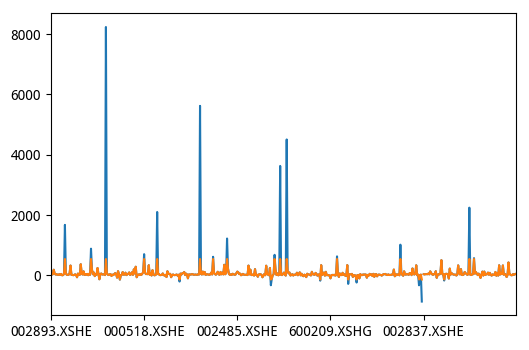

In [34]:
fund['pe_ratio'][:500].plot()
fund['pe_ration_winsorize'][:500].plot()

In [36]:
def quantile(factor,up,down): 
  """自实现分位数去极值"""
  up_scale = np.percentile(factor, up)   
  down_scale = np.percentile(factor, down)   
  factor = np.where(factor > up_scale, up_scale, factor)   
  factor = np.where(factor < down_scale, down_scale, factor)  
  return factor

In [39]:
quantile(fund['pe_ratio'], 97.5, 2.5)

array([60.9084, 28.729800000000001, 38.923499999999997, ..., 104.4151,
       203.64580000000001, 22.5595], dtype=object)

In [40]:
def mad(factor):
  """
  实现3倍中位数绝对偏差去极值
  """
  # 1、找出因子的中位数 median
  me = np.median(factor)
  
  # 2、得到每个因子值与中位数的绝对偏差值 |x – median|
  # 3、得到绝对偏差值的中位数， MAD，median(|x – median|)
  # np.median(abs(factor - me))就是MAD
  mad = np.median(abs(factor - me))
  
  # 4、计算MAD_e = 1.4826*MAD，然后确定参数 n，做出调整
  # 求出3倍中位数上下限制
  up = me + (3 * 1.4826 * mad)
  down = me - (3 * 1.4826 * mad)
  
  # 利用3倍中位数的值去极值
  factor = np.where(factor > up, up, factor)
  factor = np.where(factor < down, down, factor)
  return factor

In [41]:
# 对pe_ratio去极值
fund['pe_ratio_3mad'] = mad(fund['pe_ratio'])

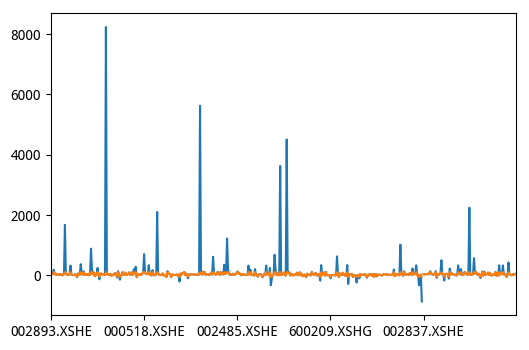

In [42]:
fund['pe_ratio'][:500].plot()
fund['pe_ratio_3mad'][:500].plot()

In [52]:
def threesigma(factor):
  """3sigma方法去极值
  """
  # 计算平均值和标准差
  mean = factor.mean()
  std = factor.std()
  
  # 计算上下限的数据
  up = mean + 3 * std
  
  down = mean - 3 * std
  
  # 替换极值
  factor = np.where(factor > up, up, factor)
  factor = np.where(factor < down, down, factor)
  
  return factor

In [53]:
fund['pe_ratio_3sigma'] = threesigma(fund['pe_ratio'])

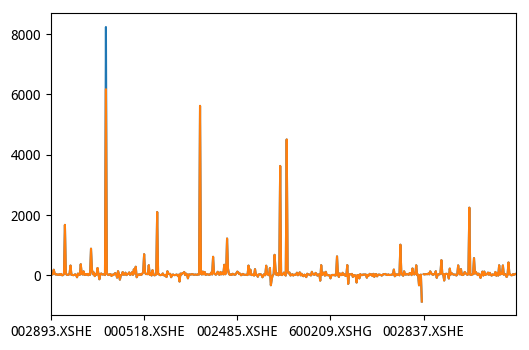

In [54]:
fund['pe_ratio'][:500].plot()
fund['pe_ratio_3sigma'][:500].plot()

In [58]:
# 2、标准化处理
std = StandardScaler()

In [62]:
std.fit_transform(fund['pe_ratio_3mad'].dropna())

/opt/conda/envs/ricequant/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
/opt/conda/envs/ricequant/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/opt/conda/envs/ricequant/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


array([ 0.61154875, -0.19356139,  0.06148548, ...,  1.70008851,
        1.82699859, -0.3479426 ])

In [63]:
def stand(factor):
  """自实现标准化
  """
  mean = factor.mean()
  std = factor.std()
  
  return (factor - mean ) / std

In [65]:
fund['pe_ration_stand'] = stand(fund['pe_ratio_3mad'])

In [66]:
fund

pe_ratio pe_ration_winsorize pe_ratio_3mad pe_ratio_3sigma  \
002893.XSHE  60.9084             60.9084       60.9084         60.9084   
600977.XSHG  28.7298             28.7298       28.7298         28.7298   
002074.XSHE  38.9235             38.9235       38.9235         38.9235   
002184.XSHE  189.209             189.209       109.487         189.209   
603042.XSHG   64.483              64.483        64.483          64.483   
002075.XSHE  29.9032             29.9032       29.9032         29.9032   
002182.XSHE  43.9879             43.9879       43.9879         43.9879   
002183.XSHE  22.7842             22.7842       22.7842         22.7842   
002416.XSHE  17.1886             17.1886       17.1886         17.1886   
300477.XSHE   40.505              40.505        40.505          40.505   
600017.XSHG  21.4169             21.4169       21.4169         21.4169   
002411.XSHE  48.8637             48.8637       48.8637         48.8637   
601808.XSHG    4.431               4.431         4.431           4.431   
601588.XSHG  11.5825             11.5825       11.5825         11.5825   
300484.XSHE  44.4912             44.4912       44.4912         44.4912   
002178.XSHE  1674.81             543.661       109.487         1674.81   
300555.XSHE  67.0313             67.0313       67.0313         67.0313   
300547.XSHE  20.7472             20.7472       20.7472         20.7472   
300197.XSHE  18.5484             18.5484       18.5484         18.5484   
300193.XSHE  20.5606             20.5606       20.5606         20.5606   
603019.XSHG  66.7876             66.7876       66.7876         66.7876   
603300.XSHG  327.749             327.749       109.487         327.749   
002180.XSHE  15.8876             15.8876       15.8876         15.8876   
601886.XSHG  17.4291             17.4291       17.4291         17.4291   
002073.XSHE   7.8712              7.8712        7.8712          7.8712   
300061.XSHE  17.3925             17.3925       17.3925         17.3925   
002179.XSHE  35.5506             35.5506       35.5506         35.5506   
300284.XSHE  17.3619             17.3619       17.3619         17.3619   
002072.XSHE -60.1403            -60.1403      -49.1362        -60.1403   
300526.XSHE  61.8497             61.8497       61.8497         61.8497   
...              ...                 ...           ...             ...   
002444.XSHE   31.582              31.582        31.582          31.582   
601999.XSHG  21.9545             21.9545       21.9545         21.9545   
300173.XSHE  77.2214             77.2214       77.2214         77.2214   
600686.XSHG   4.7161              4.7161        4.7161          4.7161   
002093.XSHE  38.6285             38.6285       38.6285         38.6285   
600315.XSHG  41.9093             41.9093       41.9093         41.9093   
600055.XSHG  58.3986             58.3986       58.3986         58.3986   
000571.XSHE  469.476             469.476       109.487         469.476   
000717.XSHE   4.5675              4.5675        4.5675          4.5675   
000893.XSHE  -1.4607             -1.4607       -1.4607         -1.4607   
603678.XSHG  44.8997             44.8997       44.8997         44.8997   
603040.XSHG   26.545              26.545        26.545          26.545   
603607.XSHG  37.8562             37.8562       37.8562         37.8562   
002723.XSHE  447.017             447.017       109.487         447.017   
300382.XSHE  28.9685             28.9685       28.9685         28.9685   
300400.XSHE  29.8216             29.8216       29.8216         29.8216   
300320.XSHE  34.5819             34.5819       34.5819         34.5819   
002592.XSHE  44.5782             44.5782       44.5782         44.5782   
300110.XSHE  278.141             278.141       109.487         278.141   
600998.XSHG  18.0026             18.0026       18.0026         18.0026   
300101.XSHE   350.93              350.93       109.487          350.93   
002197.XSHE  202.689             202.689       109.487         202.689   
002441.XSHE  21.

In [ ]:
# 获取两个因子数据
# 对目标值因子-市净率进行去极值、标准化处理
# 建立市值与市净率回归方程
# 通过回归系数，预测新的因子结果y_predict
# 求出市净率与y_predict的偏差即为新的因子值

In [69]:
# 1、 获取数据
q = query(fundamentals.eod_derivative_indicator.pb_ratio,
         fundamentals.eod_derivative_indicator.market_cap)

fund = get_fundamentals(q, entry_date="2018-01-03")[:, 0, :]

In [71]:
# 2、对因子数据进行处理,3倍中位数、stand
fund['pb_ratio'] = mad(fund['pb_ratio'])
fund['pb_ratio'] = stand(fund['pb_ratio'])

In [ ]:
# 对于市值因子可以选择处理

In [75]:
# 3、确定建立回归方程特征值和目标值
# 传入训练的特征值是二维的形状
x = fund['market_cap'].reshape(-1, 1)
y = fund['pb_ratio']

/opt/conda/envs/ricequant/bin/rq-research-kernel:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


In [76]:
# 4、利用线性回归进行预测
lr = LinearRegression()
lr.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [79]:
# 5、得出每个预测值，让因子的真实值-预测值得出的误差，就为我们中性化处理之后的结果
y_predict = lr.predict(x)

In [82]:
res = y - y_predict

In [84]:
fund['pb_ratio'] = res

In [85]:
fund

pb_ratio   market_cap
601211.XSHG -0.952216  1.67133e+11
002705.XSHE -0.462954  1.04364e+10
300531.XSHE   1.73412    4.494e+09
300363.XSHE  0.152555  5.67849e+09
600977.XSHG -0.442247  2.90692e+10
002843.XSHE   0.62334  3.13996e+09
002707.XSHE  0.169109  9.29116e+09
601579.XSHG -0.848725  5.98324e+09
002748.XSHE -0.307348   3.6456e+09
300373.XSHE   1.09656  1.39385e+10
002866.XSHE  0.982678  5.27254e+09
300360.XSHE -0.737706  4.55087e+09
000166.XSHE -0.361716  1.07704e+11
300498.XSHE  0.139418  1.27377e+11
300581.XSHE  0.560461  2.80059e+09
300570.XSHE  0.295409  4.94723e+09
002429.XSHE -0.832061  1.64328e+10
603357.XSHG  0.112807  7.28567e+09
000780.XSHE  -1.25132  5.12225e+09
300545.XSHE   2.33819  4.76285e+09
600192.XSHG  -1.06594  2.95529e+09
600191.XSHG  -0.99437  3.71458e+09
600190.XSHG  -1.11317  8.44967e+09
300543.XSHE  0.924669   3.7872e+09
300436.XSHE    1.7789  4.20991e+09
002226.XSHE  -1.01195  5.78662e+09
300357.XSHE   2.34065  8.06707e+09
300505.XSHE  0.317731  2.99406e+09
600633.XSHG  -0.59128  1.96851e+10
002697.XSHE  0.150316   9.5472e+09
...               ...          ...
603528.XSHG  0.143376  5.59896e+09
300604.XSHE   2.33821  4.79236e+09
601011.XSHG -0.566091  1.46454e+10
603158.XSHG  0.112852  4.03269e+09
603726.XSHG -0.113689  2.91075e+09
002403.XSHE -0.861557  4.30895e+09
002607.XSHE -0.959481  3.33056e+09
002629.XSHE  0.267125  2.95367e+09
600475.XSHG  -0.91086  8.20628e+09
000613.XSHE   2.33679  2.87275e+09
600039.XSHG  -1.23285  1.48754e+10
000007.XSHE   2.33894  5.77182e+09
600863.XSHG -0.991333  1.74232e+10
300642.XSHE   1.07547   5.4756e+09
300585.XSHE   1.49601   3.1424e+09
603117.XSHG -0.834464  4.57698e+09
603698.XSHG -0.214778  8.30784e+09
603239.XSHG  0.779757  5.44147e+09
603101.XSHG -0.594659   3.2664e+09
300190.XSHE  -1.05466  5.53597e+09
601908.XSHG -0.987772  1.09542e+10
002602.XSHE    1.4436  3.46233e+10
002368.XSHE  0.125166  1.06382e+10
002402.XSHE   1.02602  7.92596e+09
600865.XSHG -0.941013  3.01368e+09
600470.XSHG  -1.08643  3.04614e+09
000017.XSHE   2.33724  3.47901e+09
600033.XSHG  -1.22426  1.00994e+10
000612.XSHE  -0.66774  1.10994e+10
600073.XSHG -0.748761   7.7644e+09

[3469 rows x 2 columns]